# Homework 8a: Traveling Salesperson, Animation
Physics 177, Spring 2018  
**Due:** Thursday, May 24

*Enter your name here*

## Discussion

Nothing deep in this one. The goal is to understand the **simulated annealing** solution to the traveling salesperson problem that we sketched out <a href="https://github.com/Physics177-2018/Lecture_14">in class</a>. You'll code it up here with the additional twist of generating an animated png.

Recall that the Markov Chain Monte Carlo rules for simualted annealing are:
1. Start with a randomly generated *microstate*. In this problem, a microstate is a particular path that visits every "city" exactly once and returns to the original city.
2. Pick a proposed allowed *step*. In this problem, a step is swapping the order of two cities on the list. For example, if the list is: "`LA`, `SF`, `DC`, `NY`" and a proposed step may be to swap the second and fourth cities, so that the proposed new list is "`LA`, `NY`, `DC`, `SF`."
3. (a) If the step is *energetically favorable*, do it. In this problem, *energy* is identified with total distance traveled on the path. Our goal is to minimize the total distance the salesperson travels.
3. (b) If the step is *energentically unfavorable*, then "roll the dice" to see whether you take it. The probability of taking the step is $$P_{i\leftrightarrow j} = e^{-\Delta E/T}$$ 
where $T$ is the "temperature." To do this, generate a random number from 0 to 1; if the number is below $e^{-\text{distance}/T}$, then take the step. Otherwise, do not.
4. Cool the temperature. A typical choice for the **cooling schedule** is $$T(t) = T_\text{max} e^{-t/\tau}$$ where $T_\text{max}$ is an initial "temperature" and $\tau$ is a relaxation time scale that determines how fast we anneal. A larger relaxation time is more likely to find a global minimum, but takes longer to run.
5. Repeat steps 2-4 until the temperature reaches some $T_\text{min}$, after which we assume the system has frozen into its minimum "energy" state.

## Problem 1: Simulated Annealing

Fill in the code below to use simulated annealing to "solve" the traveling salesperson problem. The solution in class was heavily based on the code from the textbook, which is available <a href="http://www-personal.umich.edu/~mejn/cp/programs/salesman.py">here</a>.

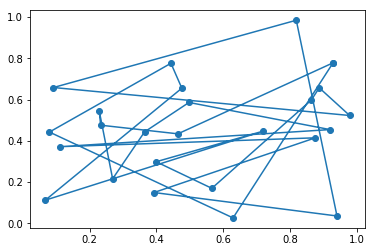

Initial distance traveled:
11.475320084881577


In [28]:
# Initial code: nothing to update here, 
# but make sure you understand it.

from math import sqrt, exp
import numpy as np
from random import random, randrange
import matplotlib.pyplot as plt

# PARAMETERS OF THE PROBLEM
N = 25      # number of cities
Tmax = 10.0 # hot temperature (a distance)
Tmin = 1e-3 # cold temperature (controls number of steps)
tau = 1e4   # relaxation constant (controls rate of cooling)

# SET UP THE PROBLEM: generate N "cities" ((x,y) coordinate pairs)
r = np.empty([N+1,2],float)

for location in r:
    location[0] = random()
    location[1] = random()

# end where you begin
r[N] = r[0]

# Define norm and distance
def norm(coord_pair):
    return np.linalg.norm(coord_pair)

def total_distance(array_of_locations):
    dist = 0
    for i in np.arange(1,N):
        relative_coords = array_of_locations[i] - array_of_locations[i-1]
        dist += norm(relative_coords)
    return dist

distance = total_distance(r)

# Helper function: swap two locations
def swapPoints(array_of_locations, i, j):
    """enacts r[i], r[j] == r[j], r[i]"""
#   to avoid pointer confusion
    ix = array_of_locations[i][0]
    iy = array_of_locations[i][1]
    jx = array_of_locations[j][0]
    jy = array_of_locations[j][1]
    array_of_locations[j][0] = ix
    array_of_locations[j][1] = iy
    array_of_locations[i][0] = jx
    array_of_locations[i][1] = jy


# output x and y values to make it easy to plot
def xyarrays(array_of_locations):
    """output: x values array, y value array"""
    xs = []
    ys = []
    for location in r:
        xs.append(location[0])
        ys.append(location[1])
    return xs, ys

xs, ys = xyarrays(r)
plt.plot(xs, ys, 'o-')
plt.show()

print("Initial distance traveled:")
print(distance)

In [ ]:
# for timing... the algorithm takes less than 1 minute on a MacBook Air
import timeit
start_time = timeit.default_timer()

# Initialize time and temperature
t = 0
T = # FILL THIS IN

while T > Tmin:
    oldDistance = distance
    t += 1
    
    # Cool
    T = # FILL THIS IN
    
    # swap two cities 
    i, j = randrange(1,N), randrange(1,N)
    while i==j:
        # "stay" is not an allowed move
        # FILL THIS IN
    
    swapPoints(r,i,j)
    distance = total_distance(r)
    deltaD = # FILL THIS IN
    
    # if rejected, swap back
    # FILL THIS IN
    # This chunk of code should:
    # 1. swap the i and j components of r
    # 2. set distance to the correct value
    
    # plot every 10,000 snapshots
    if t%10000==0:
        xs, ys = xyarrays(r)
        plt.plot(xs, ys, 'o-')
        plt.show()

elapsed = timeit.default_timer() - start_time
print("Time: ")
print(elapsed)
print("index: ")
print(t)

Running the above code should generate a series of plots of sequentially better paths to reach all `N` cities with the least amount of gas.

## Problem 2: A trick for creating animations

Copy and paste your working code from Problem 1. Insert code to generate an animated png of the process.

1. Create a directory "/HW8a" in the same folder where this homework is located. 
2. Install <a href="https://github.com/eight04/pyAPNG">pyAPNG</a>. You should be able to do this using pypi (`pip install apng` at the command line)

This method is inspired by <a href="https://www.reddit.com/r/dataisbeautiful/comments/8kh2w4/monte_carlo_simulation_of_pi_oc/">r / dataisbeautiful / Monte Carlo simulation of Pi [OC]</a>. The code for that example is available <a href="https://github.com/arnavbarbaad/Monte_Carlo_Pi/blob/master/main.py">here</a>.

In [29]:
# for timing... the algorithm takes less than 1 minute on a MacBook Air
import timeit
start_time = timeit.default_timer()


# THIS IS NEW
# Initialize plot
xs, ys = xyarrays(r)
plt.plot(xs, ys, 'o-')
plt.savefig("HW8a/frame" + str(0))
plt.clf()

# Initialize time and temperature
t = 0
T = Tmax

## FILL IN YOUR WORKING CODE FROM PROBLEM 1
    
    # plot
    if t%10000==0:
        xs, ys = xyarrays(r)
        plt.plot(xs, ys, 'o-')
        # THIS IS NEW! 
        # Make sure the HW8a directory already exists
        plt.savefig("HW8a/frame" + str(image_num))
        image_num += 1
        plt.clf() # Clear the canvas
        
# Add Final state:
xs, ys = xyarrays(r)
plt.plot(xs, ys, 'o-')
plt.savefig("HW8a/frame" + str(image_num))
plt.clf()

elapsed = timeit.default_timer() - start_time
print("Time: ")
print(elapsed)
print("index: ")
print(t)

Time: 
31.068861829000525
index: 
92104


<Figure size 432x288 with 0 Axes>

In [30]:
# Make sure you've installed apng
# Run: `pip install apng` from the command line

from apng import APNG

filenames = []
for i in range(image_num):
    filenames.append("HW8a/frame" + str(i) + ".png")

APNG.from_files(filenames, delay=100).save("HW8a.png")

This should display the animated png. "Evaluate" this cell once you've created a "HW8a.png".

<img src="HW8a.png">

Here's an example of what it should look like:
<img src="HW8a_sample.png">